### Import package

In [1]:
import TopoSPAM as TopoSPAM
from TopoSPAM.mesh_methods import *
%matplotlib inline
TopoSPAM.set_repo_path('/Users/krishna/PhD/TopoSPAM')

Success: The path '/Users/krishna/PhD/TopoSPAM' contains the TopoSPAM repository.


### Initialize mesh and parameters

In [2]:
Params = TopoSPAM.SpringLatticeParameters()

In [3]:
Params.thickness = 0.08
Params.mesh_geometry = "circle"
Params = TopoSPAM.load_mesh(Params)

## Initialize strain pattern

We implement strain using a spontaneous strain tensor $\underline{\underline{\lambda}}$. This $\underline{\underline{\lambda}}$ is second rank tensor, consisting of nine elements. For this notebook, we use $\underline{\underline{\lambda}}$ with only the diagonal terms being non-zero. This means that you can implement spontaneous strains in the principal directions. Hence, let us write $\underline{\underline{\lambda}} = (\lambda_1, \lambda_2, \lambda_3)$, where $\lambda_1$ and $\lambda_2$ are strains along the two in-surface principal directions and $\lambda_3$ is along the thickness of the surface. Each of the $\lambda_i$ should be a function of $x_1, x_2$ which are the in-surface coordinates.

In [4]:
Params.nematic_coordinates = "polar" #x1: radial, x2: angular
# Params.nematic_coordinates = "cartesian" #x1: x, x2: y

def lambda1(x1,x2):
    return 1 + 0.3*x1 + 0.3*x2
def lambda2(x1,x2): 
    return 1
def lambda3(x1,x2):
    return 1

Params.lambda_tensor_diagonal = [lambda1,lambda2,lambda3]

Params = TopoSPAM.load_strain_pattern(Params)

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'Strain Pattern'}>)

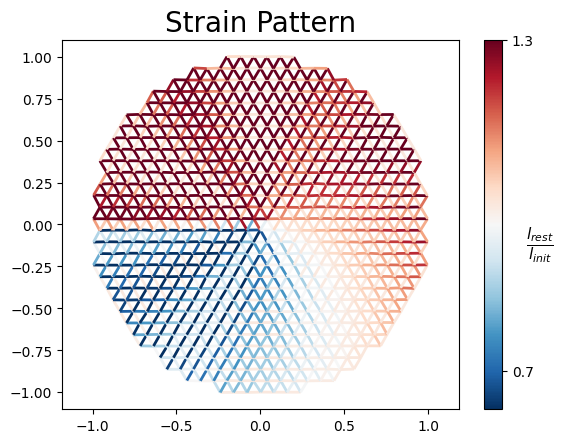

In [5]:
springs = Params.springs
Params.springs = springs
TopoSPAM.visualize(Params, state="initial", color_max=0.7, color_min=1.3,)

## --- Works till here --

### Perform the simulation

In [6]:

#add noise
import numpy as np
np.random.seed(0)
Params = TopoSPAM.add_noise(Params, noise = 0.01)
#perform simulation
Params=TopoSPAM.RunSpringLatticeSimulation(Params, tol = 5*1e-8)

Implementing external forces
$$$$$$$ Running openfpm $$$$$$$
mpic++ -O3 -march=native -c --std=c++14 -o SpringLattice.o SpringLattice.cpp -I -Wno-deprecated-declarations -fopenmp  -I.  -I/usr/local/openfpm/openfpm_numerics/include -I/usr/local/openfpm/openfpm_pdata/include/config -I/usr/local/openfpm/openfpm_pdata/include -I/usr/local/openfpm/openfpm_data/include -I/usr/local/openfpm/openfpm_vcluster/include -I/usr/local/openfpm/openfpm_io/include -I/usr/local/openfpm/openfpm_devices/include -I/usr/local/openfpm/dependencies/VCDEVEL/include  -I/usr/local/openfpm/dependencies/METIS/include -I/usr/local/openfpm/dependencies/PARMETIS/include -I/usr/local/openfpm/dependencies/BOOST/include -I/usr/local/openfpm/dependencies/HDF5/include -I/usr/local/openfpm/dependencies/LIBHILBERT/include   -I/usr/local/openfpm/dependencies/PETSC/include -I/usr/local/openfpm/dependencies/OPENBLAS/include -I/usr/local/openfpm/dependencies/SUITESPARSE/include -I/usr/local/openfpm/dependencies/EIGEN -I/usr/loc

In file included from /usr/local/openfpm/dependencies/BOOST/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /usr/local/openfpm/dependencies/BOOST/include/boost/multi_array.hpp:34,
                 from /usr/local/openfpm/openfpm_data/include/memory_ly/memory_c.hpp:8,
                 from /usr/local/openfpm/openfpm_data/include/memory_ly/t_to_memory_c.hpp:12,
                 from /usr/local/openfpm/openfpm_data/include/memory_ly/memory_conf.hpp:12,
                 from /usr/local/openfpm/openfpm_data/include/Grid/map_grid.hpp:27,
                 from /usr/local/openfpm/openfpm_data/include/Vector/map_vector.hpp:23,
                 from /usr/local/openfpm/openfpm_vcluster/include/VCluster/VCluster_base.hpp:13,
                 from /usr/local/openfpm/openfpm_vcluster/include/VCluster/VCluster.hpp:13,
                 from /usr/local/openfpm/openfpm_io/include/HDF5_wr/HDF5_writer.hpp:12,
                 from /usr/local/openfpm/openfpm_io/include/HDF5_wr/HDF5_

mpic++ -o SpringLattice SpringLattice.o  -L/usr/local/openfpm/openfpm_devices/lib -L/usr/local/openfpm/openfpm_pdata/lib  -L/usr/local/openfpm/openfpm_vcluster/lib -L/usr/local/openfpm/dependencies/VCDEVEL/lib  -L/usr/local/openfpm/dependencies/METIS/lib -L/usr/local/openfpm/dependencies/PARMETIS/lib  -L/usr/local/openfpm/dependencies/BOOST/lib -L/usr/local/openfpm/dependencies/HDF5/lib -L/usr/local/openfpm/dependencies/LIBHILBERT/lib   -L/usr/local/openfpm/dependencies/PETSC/lib -L/usr/local/openfpm/dependencies/OPENBLAS/lib -L/usr/local/openfpm/dependencies/SUITESPARSE/lib  -fopenmp  /usr/local/Cellar/gcc@12/12.3.0/lib/gcc/12/libgomp.dylib -lvcluster -lofpm_pdata -lofpmmemory -lparmetis -lmetis -lboost_iostreams -lboost_program_options -lhdf5 -llibhilbert -lVc     -lpetsc -lopenblas -lumfpack -lamd -lbtf -lcamd -lccolamd -lcholmod -lcolamd -lcxsparse -lklu -ldl -lrbio -lspqr -lsuitesparseconfig -ldl -lboost_filesystem -lboost_system -L/usr/local/openfpm/dependencies/BOOST/lib -lboost

ld: unsupported tapi file type '!tapi-tbd' in YAML file '/Library/Developer/CommandLineTools/SDKs/MacOSX13.sdk/usr/lib/libSystem.tbd' for architecture x86_64
collect2: error: ld returned 1 exit status
make: *** [SpringLattice] Error 1
sh: ../SpringLattice: No such file or directory


$$$$ Exit OpenFPM $$$$


FileNotFoundError: [Errno 2] No such file or directory: '/Users/krishna/PhD/TopoSPAM/bin/SpringLatticeOutput/files/final_0_0.csv'

### Visualize the results

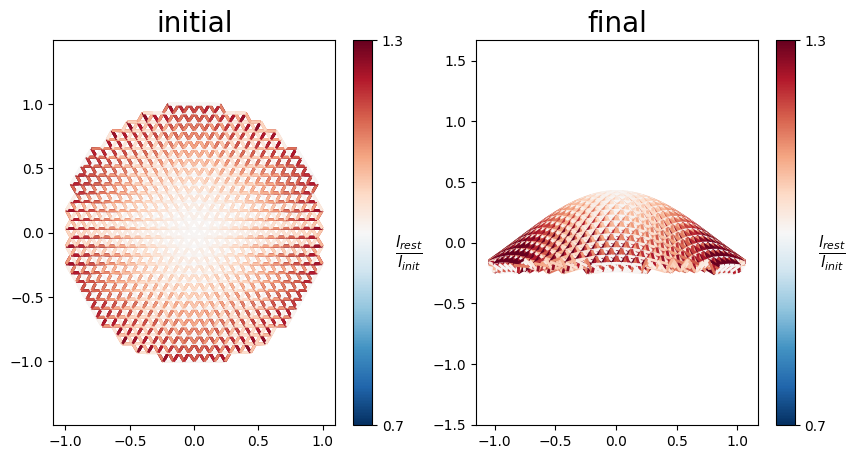

In [ ]:
#visualize the pattern
%matplotlib inline
fig,axs = plt.subplots(1,2,figsize=(10,5))

fig,axs[0] = Flat2Dome.visualize(ax = axs[0], fig = fig, mode = "discrete", state = "initial", x = "x", y = "y", title = "initial")
fig,axs[1] = Flat2Dome.visualize(ax = axs[1], fig = fig, mode = "discrete", state = "final", x = "x", y = "z", title = "final")

### Load spontaneous strain pattern

In [ ]:
#load spontaneous strain pattern
Flat2Dome.nematic_coordinates = "polar"
lambda_r = np.poly1d([0.25, 0.25, 1])
lambda_theta = np.poly1d([1])
lambda_h = np.poly1d([1])
Flat2Dome.load_strain_pattern(lambda1 = lambda_r, lambda2 = lambda_theta, lambda3 = lambda_h)